In [85]:
# A String which is contained in the labels and reviews, is also a list, therefore I can control
# whether to print the whole string or just the first 80 characters, which is what I am doind
# in the reviews[i][:80]
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")


# In here it just opens the review document
rev = open(
    'C:/Users/50671/Documents/Carlos Valverde/Deep Learning/Deep Learning Udacity/Udacity Deep Learning/reviews.txt',
    'r')

# Python map (lambda) function: map () is used to apply one function to each
# element of an iterable like list, tuple in python. map () takes one function as its
# argument and use that function on each element of the iterable. It returns the modified
# iterable.
reviews = list(map(lambda x: x[:-1], rev.readlines()))
rev.close()

# The same is done with the labels
# -1 removes the \n each element has
lab = open(
    'C:/Users/50671/Documents/Carlos Valverde/Deep Learning/Deep Learning Udacity/Udacity Deep Learning/labels.txt',
    'r')
labels = list(map(lambda x: x[:-1].upper(), lab.readlines()))
lab.close()

In [86]:
labels[0]
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

# Develop a Predictive Theory
This is probably the most important segment of all, which is to generate a predictive theory
to then try to validate or disprove it.

In [87]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

# In here I can generate a predictive theory. It could be perhaps that there are certain keywords
# that repeat in the positive label and a certain amount of keywords that repeat in the negative
# labels. Therefore I need to list all the words in a vocabulary to then try to predict a
# positive or negative outcome with the combination of those keywords

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


In [88]:
# Crucial the import of the counter object to count the appearance of certain keywords
from collections import Counter
import numpy as np

# Having three counter objects, one are the positive keywords, the second one the negative
# keywords and the third one all the words to later normalize the noise generated
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()
len(reviews)

25000

In [89]:
# Now when the label is POSITIVE then it takes al the words in the POSITIVE review and adds
# them in the positive count list. The same for when the word is negative. Therefore there are
# going to be words that will be in the negative count as well as in the positive count

for review in range(len(reviews)):
    if (labels[review] == 'POSITIVE'):
        for word in reviews[review].split(' '):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[review].split(' '):
            negative_counts[word] += 1
            total_counts[word] += 1

In [90]:
# I can later use the most_common method to see which are the most common
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [91]:
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

### Se puede notar como hay palabras como the, and y espacios que se repiten como palabras
### mas comunes, por lo que es importante remover esas palabras para ver verdaderos trends

In [92]:
# What I really want is to find the words that appear more often in the positive reviews when
# the label is positive, and the words that appear the most in the negative reviews when the
# label is negative. Therefore ratios must be used
pos_neg_ratios = Counter()
# There is also something important to consider, which is that there are going to be words
# that are only going to be used once, which can be misspelled words and others, those words
# are noise in the data, therefore they must not be considered. The word which is going to
# be considered needs to be used at least 100 times (there are 25k reviews)

# The +1 is only used in the case where dividing by zero is something possible.
for term, count in list(total_counts.most_common()):
    if (count > 50):
        pos_neg_ratio = positive_counts[term]/ float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio


In [93]:
# Examining certain pos_neg_ratios to find out if the ratios are higher for positive words
# than with negative words, also what happens with the terms that are neutral

# As I can see when the ratios are close to one, then the word is neutral
print("The positive / negative ratio for 'the' = {}".format(pos_neg_ratios['the']))

# When the word is more positive then the ratio is > 1
print("The positive / negative ratio for the word 'amazing' = {}".format(pos_neg_ratios['amazing']))

# When the word is a negative word then the ratio is < 1
print("The positive / negative ratio for 'terrible' is {}".format(pos_neg_ratios['terrible']))

The positive / negative ratio for 'the' = 1.0607993145235326
The positive / negative ratio for the word 'amazing' = 4.022813688212928
The positive / negative ratio for 'terrible' is 0.17744252873563218


In [94]:
# The problem with those values are that the numbers are not easy to compare, for example, if the word
# is more positive the ratio is for example 4, but if the word is more negative the ratio is
# for example 0.18. And the problem with this is that the positive words sum is more than the
# negative words sum, therefore the evaluation will be skewed towards the positive side.

# To fix this issue Andrew Trask converts the ratios using logarithms. When only one parameter
# is used it returns natural logarithm. In the end, extremely positive and extremely negative words will
# have positive-to-negative ratios with similar magnitudes but opposite signs.
# Al utilizar la formula que posteriormete dividen lo que hacen es igualar la balanza cuando son terminos
# positivos y negativos, debido a la forma que posee la funcion logaritmo natural, que a la izquierda
# se encuentra condicionada, al utilizar np.log(1/ratio+0.01) lo que se hace es igualar un poco la balanza
# para que la magnitud entre palabras positivas y negativas se mantenga

# What we can do is to use Andrew's logic, which is to push the negative ratio even more to counter the
# limit that the left side of the equation has with respect to the center which is 1

for word, ratio in pos_neg_ratios.most_common():
    if pos_neg_ratios[word] > 1:
        pos_neg_ratios[word] = np.log(ratio)
    else:
        # the 0.01 value is only to prevent dividing by zero
        pos_neg_ratios[word] = -np.log(1 / ratio + 0.001)



In [95]:
# Examining the keywords with their respective ratios to see the change I have made on them

# The word the which is neutral has the ratio close to zero
print("The positive / negative ratio for 'the' = {}".format(pos_neg_ratios['the']))

# The word amazing which is positive has the ratio greater than 0
print("The positive / negative ratio for the word 'amazing' = {}".format(pos_neg_ratios['amazing']))

# The work terrible which is negative has a ratio less than 0
print("The positive / negative ratio for 'terrible' is {}".format(pos_neg_ratios['terrible']))

pos_neg_ratios.most_common()

The positive / negative ratio for 'the' = 0.05902269426102881
The positive / negative ratio for the word 'amazing' = 1.3919815802404802
The positive / negative ratio for 'terrible' is -1.72928593105406


[('edie', 4.6913478822291435),
 ('antwone', 4.477336814478207),
 ('din', 4.406719247264253),
 ('gunga', 4.189654742026425),
 ('goldsworthy', 4.174387269895637),
 ('gypo', 4.0943445622221),
 ('yokai', 4.0943445622221),
 ('paulie', 4.07753744390572),
 ('visconti', 3.9318256327243257),
 ('flavia', 3.9318256327243257),
 ('gundam', 3.4231762883809305),
 ('iturbi', 3.2771447329921766),
 ('felix', 3.152736022363656),
 ('capote', 3.0122615755052013),
 ('fido', 3.0081547935525483),
 ('excellently', 2.9789251552376097),
 ('vance', 2.9444389791664403),
 ('kolchak', 2.9311937524164198),
 ('deanna', 2.9267394020670396),
 ('hayworth', 2.9267394020670396),
 ('sammo', 2.8526314299133175),
 ('biko', 2.833213344056216),
 ('sox', 2.833213344056216),
 ('laputa', 2.833213344056216),
 ('polanski', 2.8233610476132043),
 ('alvin', 2.8183982582710754),
 ('matthau', 2.80672172860924),
 ('mathieu', 2.772588722239781),
 ('gilliam', 2.7245795030534206),
 ('victoria', 2.681021528714291),
 ('chavez', 2.6672282065819

In [96]:
# Now to see the most used negative words, I have to reverse the list I have created, because the most_common
# method puts the higher values first and the lower values later
list(reversed(pos_neg_ratios.most_common()))

[('boll', -4.969820243996333),
 ('uwe', -4.624982617157782),
 ('thunderbirds', -4.127150513947278),
 ('beowulf', -4.110890257481564),
 ('dahmer', -3.989002564911327),
 ('wayans', -3.9318452403752318),
 ('seagal', -3.6441697037216514),
 ('gamera', -3.3322402238231783),
 ('dreck', -3.270873537761436),
 ('unwatchable', -3.2581349988203177),
 ('stinker', -3.208865892238882),
 ('mst', -2.9503222236896938),
 ('incoherent', -2.936944802428031),
 ('flimsy', -2.9267929720607135),
 ('dillinger', -2.833272165855592),
 ('yawn', -2.8184579579815496),
 ('unfunny', -2.6923073218657225),
 ('ugh', -2.6211115487408074),
 ('turd', -2.6211115487408074),
 ('waste', -2.6194574090454097),
 ('blah', -2.570505323032218),
 ('slugs', -2.5650262775800314),
 ('tripe', -2.4987821603235987),
 ('wtf', -2.4849899796493045),
 ('horrid', -2.4849899796493045),
 ('pointless', -2.455392013237804),
 ('atrocious', -2.4259967029092455),
 ('damme', -2.410888417197307),
 ('redeeming', -2.3683327043159674),
 ('prom', -2.36094833

## Creating the Input and Output Data:

In [97]:
# Now what I am going to do is to store all the vocabulary words in a set, to make it unchangeable, and
# the vocabulary does not need to be sorted and the set does not allow for duplicates.
# According to stackoverflow: A set cannot have duplicate elements by its mere definition
vocabulary = set(total_counts.keys())
#print(vocabulary)
vocabulary_size = len(vocabulary)

# There are in total 74074 different words used in the reviews
#print(vocabulary_size)

### Having a diagram of the neural net that I am going to be building

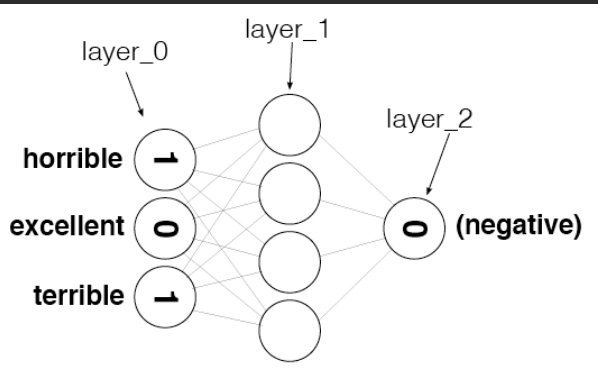

In [98]:
# This is the network that I am trying to develop, where each vocabulary word is going to be an input
# to the network
from IPython.display import Image
Image(filename='sentiment_network.png')

In [99]:
# Now what I am going to do is generate a matrix of 1 row vocabulary_size columns initialized by zeros
# The zero is going to represent a positive word and the one is going to represent a negative word

# Zeros function needs a tuple or (Rows, Columns). I have to remember that what then is needed to do is
# to multiply the inputs with the weights. The Method used by Udacity is to have the input layer as a
# Row vector, then multiply them by the weights with the layer_0 and layer_1 sizes to keep in mind
layer_0 = np.zeros((1, vocabulary_size))
print(layer_0)

[[0. 0. 0. ... 0. 0. 0.]]


In [100]:
# It is important to know the index of each word, to later then make a prediction on which each combination
# of words if going to be taken into account to generate a better prediction.
# Therefore generating a dictionary that contains th vocabulary words
# this are the words that are more inclined to mean something in the reviews
important_vocabulary = set()
for term, ratio in pos_neg_ratios.items():
    if 0.5 < ratio or ratio < -0.5:
        important_vocabulary.add(term)

In [173]:
# Enumerating the words to fill them into the input layer
word2index = {}

for index, word in enumerate(important_vocabulary):
    word2index[word] = index
print(word2index)

{'lower': 0, 'loosely': 1, 'seeking': 2, 'gore': 3, 'ham': 4, 'wretched': 5, 'classy': 6, 'dynamics': 7, 'sensitive': 8, 'biko': 9, 'root': 10, 'dreary': 11, 'clan': 12, 'russell': 13, 'stages': 14, 'appreciate': 15, 'destiny': 16, 'bullets': 17, 'temple': 18, 'esther': 19, 'knightley': 20, 'draws': 21, 'demons': 22, 'shoot': 23, 'indulgent': 24, 'panic': 25, 'jealousy': 26, 'insomnia': 27, 'overcome': 28, 'obnoxious': 29, 'navy': 30, 'loving': 31, 'marvel': 32, 'oliver': 33, 'respected': 34, 'retired': 35, 'low': 36, 'coffin': 37, 'melting': 38, 'achievement': 39, 'sublime': 40, 'nuclear': 41, 'retarded': 42, 'grandfather': 43, 'magnificent': 44, 'britain': 45, 'corpses': 46, 'forest': 47, 'toilet': 48, 'unforgettable': 49, 'remakes': 50, 'anime': 51, 'bible': 52, 'vintage': 53, 'kansas': 54, 'stern': 55, 'otto': 56, 'shine': 57, 'diverse': 58, 'hearted': 59, 'splatter': 60, 'simmons': 61, 'approach': 62, 'carol': 63, 'madsen': 64, 'fantasy': 65, 'jerk': 66, 'royal': 67, 'reason': 68,

In [102]:
# Now the next step is something I do not quite understand, which is they count the number of appearances
# a word has in a certain review, it makes sense because the more positive associated words the review has
# the more prone is the review to be positive, but it is something that the network architecture does not
# take into account

def update_input_layer(review):
    # What needs to be done is to generate a vector form of a given review to associate each word it has
    # for each review the input layer needs to be cleared
    global layer_0
    layer_0 = layer_0 * 0

    # count how many times a certain word appeared in a review and store it in the input layer
    for word in review.split(' '):

        # This needs to be accessed this way, first the rows and second the columns
        # It is important to catch the error for when the key is not found in the dictionary, this needs
        # to be done because there are lots of words that are nor present in the word2index because of the
        # optimization made in there
        try:
            layer_0[0][word2index[word]] += 1
        except KeyError:
            print('Word was not found')

In [103]:
# Testing the first review
update_input_layer(reviews[0])

Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not found
Word was not

In [104]:
layer_0


array([[0., 0., 0., ..., 0., 0., 0.]])

In [105]:
# Now converting the targets from labels. Remembering that POSITIVE = 1 and NEGATIVE = 0
def get_target_for_label(label):
    if label == 'POSITIVE':
        return 1
    else:
        return 0

In [106]:
labels[0]
get_target_for_label(labels[0])

1

### Building the Neural Network
En este caso lo interesante es que no se van a utilizar funciones de activacion para las capas ocultas
por lo que seran totalmente lineales tales capas.
- Menciona que es importante ver si se puede comprar el libro de [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (Check inside your classroom for a discount code)

In [107]:
# lo siguiente es para comprobar los tiempos que tarda el sistema en realizar el aprendizaje
import time

#Esto es para poder realizar las impresiones
import sys

#Esto es para realizar los calculos matematicos
import numpy as np


#Generando la clase de SentimentNetwork
class SentimentNetwork:

    # In this case the default parameter is the hidden_nodes and the learning_rate
    # As arguments must receive reviews (list, of reviews used for training), labels (list, POSITIVE and
    # NEGATIVE labels), hidden_nodes
    # and learning_rate
    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.1):

        # assigning a seed to ensure getting reproducible results
        np.random.seed(1)

        # I have to remember that the data needs to be pre processed before training the net
        self.pre_process_data(reviews, labels)

        # Otro metodo que tiene que hacerse de manera automatica para generar el objeto de SentimentNetwork
        # The input layer quantity needs to be the length of the vocabulary all the words that generate the
        # reviews
        # In this case the output node is just 1, as this is going to indicate whether the output is POSITIVE
        # or NEGATIVE
        self.init_network(len(self.review_vocab), hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        # Using the same logic as before where the word vocabulary needs to be extracted, A set is generated
        # so that no words are repeated
        review_vocab = set()
        for review in reviews:
            for word in review.split(' '):
                review_vocab.add(word)

        # Set has no index to be accessed, therefore, the set needs to be converted into a list, so that
        # all the information could be accessed via the indices
        # se le asigna review_vocab al objeto de manera global propia, el otro review_vocab es solamente
        # para realizar los calculos necesarios
        self.review_vocab = list(review_vocab)

        # Este paso no entiendo realmente porque lo hacen si se supone que solamente son dos outcomes
        # los cuales son NEGATIVE y POSITIVE
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # The same way as the reviews set, I need to convert the set as a list to be able to access them
        # with indices
        self.label_vocab = list(label_vocab)

        # Generating the sizes of the review_vocab and labels
        self.review_vocab_size = len(review_vocab)
        self.label_vocab_size = len(label_vocab)

        # now creating a dictionary of words to have them indexed, so each word will have an index and also
        # their proper enumeration
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # Now doing the same for the labels
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    # Now initializing the neural network to generate de deep learning
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        # Setting the variables
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        # Initializing the weight as they suppossed to be in the best way they neet to be initialized
        # Andrew initializes the weights as a zero array, but I believe that this should be better initialized
        # as a random generated array. Se desea que la desviacion estandar sea la raiz de ... para que asi
        # los valores se centren mas cercano al cero para asi evitar pesos muy grandes
        # En este caso van a hacer una matriz de la forma columna, ya que seran filas el numero de vocabulario
        # y el numero de columnas 10 el cual es el numero de hidden nodes (caso default)
        # Tariq en este caso lo hace un vector fila, por lo que cambia el orden a (hidden_nodes, input_nodes)
        self.weights_0_1 = np.random.normal(0.0, self.input_nodes ** -0.5, (self.input_nodes, self.hidden_nodes))

        # Then initializing the weights of hidden-output in the same fashion as before
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes ** -0.5,
                                            (self.hidden_nodes, self.output_nodes))

        # Then initializing the input layer first as a zero matrix form vector.
        # Tiene la forma de matriz de una fila con la cantidad de columnas de los input nodes
        self.layer_0 = np.zeros((1, self.input_nodes))

    def update_input_layer(self, review):
        # Este metodo lo que hace es resetear la capa de inputs a cero para que vuelva a ser populado
        # por un nuevo review, por lo que lo que hace es que en cada nuevo review, vuelve a captar todas las palabras
        # de ese nuevo review para generar una nueva prediccion
        self.layer_0 *= 0

        for word in review.split(' '):
            # It it mentioned that this next if statement is necessary because the word needs to be part of
            # the dictionary, because accessing an invalid key throws an exception error
            if (word in self.word2index.keys()):
                # aca utiliza el sistema de [][] debido a que tiene que accesar a la fila y postiormente
                # accesar a la columna, ya que no es una lista normal en donde puedo ir cambiando el indice
                # solamente con un solo [], para ir pasando debo de poner [0] que indica que quiero moverme
                # en la fila numero uno y posteriormente irme moviendo dentro de [este parentesis]
                # lo que se hace es ir aumentando el contador para cuando se va aumentando el numero de
                # palabras que se encuentran dentro del review, es decir si encuentra una misma palabra
                # varias veces entonce lo que hace es ir aumentando el contador de esa palabra
                self.layer_0[0][self.word2index[word]] += 1

    # This method takes the label and converts it into 1's or 0's
    def get_target_for_label(self, label):
        if (label == 'POSITIVE'):
            return 1
        else:
            return 0

    # Now one of the keys to generate a deep neural network, defining the activation function that the net
    # is going to use
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Now defining the derivative of the sigmoid function
    def sigmoid_output_2_derivative(self, output):
        return output * (1 - output)

    # Now the training method, taking into consideration that it needs to back propagate and forward propagate
    # in order to do the backpropagation, the output values that are desired are needed to calculate the error
    # those values are the training_labels. And to do the forward propagation the training_reviews are needed
    def train(self, training_reviews, training_labels):

        # this next variable is super useful to keep track of the accuracy of the net
        correct_so_far = 0

        # this other line of code is very important to make sure that the amount of reviews match the amount
        # of labels
        assert (len(training_labels) == len(
            training_reviews)), 'The amount of reviews does NOT match the amount of labels'

        # Now some time controling for efficiency purposes
        start = time.time()

        # The interesting part, doing the forward and backpropagation, where it is going to do a pass while
        # updating the weights
        for i in range(len(training_reviews)):
            # Getting the proper review and label
            review = training_reviews[i]
            label = training_labels[i]

            # Implementation of the forward pass here
            self.update_input_layer(review)

            # Defining the hidden layer INPUTS
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer OUTPUT, remember that in this case, Andrey Transk decided to not generate a non-linear
            # hidden layer by not utilizing the activation function in said layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            # HERE finishes the forward propagation
            # Now it is time for the backpropagation, which is all about error, that is, the key of neural nets
            # is about learning from mistakes.

            # Output error, which is the difference between the desired target and the actual output, in this
            # case the errors are inverted, because Trask made Actual Output - Desired Target
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error. Aca hay una diferencia entre lo que hace Tariq, ya que para el, el error
            # en la capa hidden es weights_hidden_output.T * error_output. Lo que difiere con lo que hace
            # Andrew ya que el lo multiplica por Output (1-Output), que vienen siendo Sigmoid (1 - Sigmoid)
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)

            # This is the same because no activation function is applied
            layer_1_delta = layer_1_error

            # Now for some weight updates

            #For the weights between hidden and output. En este caso el Oj que faltaba en la ecuacion anterior
            # Es este mismo.
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate

            # In here, because the hidden does not apply an activation function, the Output ( 1 - Output ) is not
            # needed. In here it is important to follow it with respect to the equation, therefore, explain it
            # a bit more in there.
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate

            # To keep track of the correct labeling predictions
            # Remember that the layer_2 is the Output
            if (layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif (layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1

            # For debugging purposes, print the prediction accuracy and the speed throughout the whole training
            # process

            elapsed_time = float(time.time() - start)

            # This code is straight out CTR-C and CTRL V from Andrew's code
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i / float(len(training_reviews)))[:4]
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5]
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i + 1)
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i + 1))[:4] + "%")
            if (i % 2500 == 0):
                print("")

    def run(self, review):
        """"
        Returns a POSITIVE or NEGATIVE prediction for a given review. It is just like the query function that
        Tariq created. This function generate a forward propagation but the weights have already been trained,
        therefore the prediction is made once the forward propagation is finished. It is very similar as the
        training method, but the backpropagation is not needed here, because the training has been done already
        """

        # First remember that the review needs to be treated first and inject them in the input layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output Layer. In here I have to remember to use the sigmoid function in order to get a value
        # from zero to one
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

        # Now the interesting part which is to assign a value to the prediction thrown by the sigmoid
        # function. The also interesting thing here is that the result is an array, therefore the position
        # at [0] must be selected in order to get the right value (print it to see if this is true)
        if (layer_2[0] >= 0.5):
            return 'POSITIVE'
        else:
            return 'NEGATIVE'

    def test(self, testing_reviews, testing_labels):

        '''
        Attempts to predict the labels for the testing reviews,this is the main thing to look at for when
        training neural networks. Uses the testing labels to analize the accuracy of the model I have created
        '''

        correct = 0
        start = time.time()

        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if pred == testing_labels[i]:
                correct += 1

            # For debug purposes, print out our prediction accuracy and speed
            # throughout the prediction process.

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

The layer _ delta series is actually the Error * Output * (1 - Output), which is part of the gradient
descent for error minimization

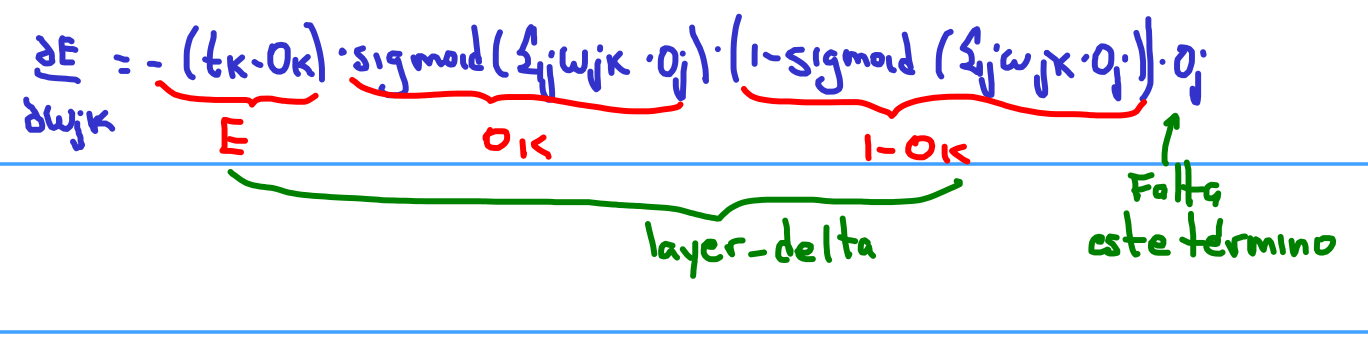

In [108]:
from IPython.display import Image
Image(filename='layer_delta.png')

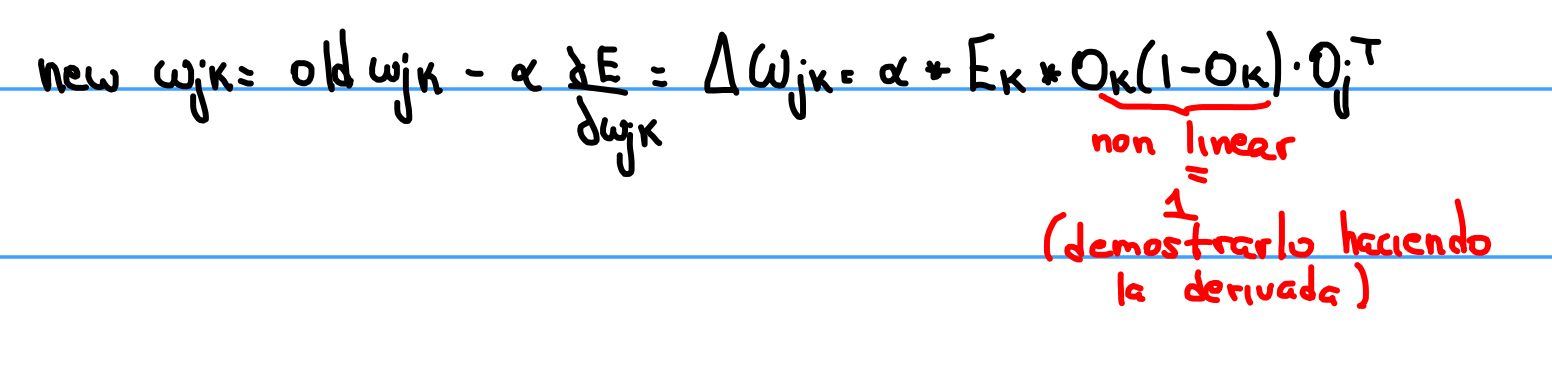

In [109]:
from IPython.display import Image
Image(filename='weights_update.PNG')

In [110]:
# Generating the Neural Network, remember to save the last 1000 for testing purposes
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.1)

# Now I am going to run the following cell to view the results of an untrained model, the result should
# be similar to 50% because there are only 2 possible outcomes (POSITIVE or NEGATIVE). This test is
# from the last 100o reviews, which are the ones saved for testing purposes
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):819.5 #Correct:505 #Tested:1000 Testing Accuracy:50.5%

In [111]:
# Now the following cell for training purposes
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):106.9 #Correct:1091 #Trained:2501 Training Accuracy:43.6%
Progress:20.8% Speed(reviews/sec):109.9 #Correct:2284 #Trained:5001 Training Accuracy:45.6%
Progress:31.2% Speed(reviews/sec):111.1 #Correct:3534 #Trained:7501 Training Accuracy:47.1%
Progress:41.6% Speed(reviews/sec):111.8 #Correct:4784 #Trained:10001 Training Accuracy:47.8%
Progress:52.0% Speed(reviews/sec):111.8 #Correct:6034 #Trained:12501 Training Accuracy:48.2%
Progress:62.5% Speed(reviews/sec):112.1 #Correct:7284 #Trained:15001 Training Accuracy:48.5%
Progress:72.9% Speed(reviews/sec):111.9 #Correct:8488 #Trained:17501 Training Accuracy:48.5%
Progress:83.3% Speed(reviews/sec):111.4 #Correct:9736 #Trained:20001 Training Accuracy:48.6%
Progress:93.7% Speed(reviews/sec):111.4 #Correct:11009 #Trained:22501 Training Accuracy:48.9%
Progress:99.9% Speed(reviews/sec):111.5 #Correct:11769 #Trained:24000 Training Accura

The last training did not went well. One of the reasons might be that the learning rate might be too high
which increases the step size taken and might overshoot the target weight values. Therefore one plan
might be to decrease the learning rate by 0.01

In [112]:
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])


Progress:0.0% Speed(reviews/sec):0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):107.4 #Correct:1406 #Trained:2501 Training Accuracy:56.2%
Progress:20.8% Speed(reviews/sec):107.3 #Correct:2986 #Trained:5001 Training Accuracy:59.7%
Progress:31.2% Speed(reviews/sec):101.1 #Correct:4644 #Trained:7501 Training Accuracy:61.9%
Progress:41.6% Speed(reviews/sec):96.94 #Correct:6370 #Trained:10001 Training Accuracy:63.6%
Progress:52.0% Speed(reviews/sec):93.84 #Correct:8134 #Trained:12501 Training Accuracy:65.0%
Progress:62.5% Speed(reviews/sec):92.56 #Correct:9913 #Trained:15001 Training Accuracy:66.0%
Progress:72.9% Speed(reviews/sec):91.68 #Correct:11687 #Trained:17501 Training Accuracy:66.7%
Progress:83.3% Speed(reviews/sec):91.01 #Correct:13539 #Trained:20001 Training Accuracy:67.6%
Progress:93.7% Speed(reviews/sec):90.47 #Correct:15388 #Trained:22501 Training Accuracy:68.3%
Progress:99.9% Speed(reviews/sec):89.85 #Correct:16532 #Trained:24000 Training Accu

In [113]:
# Se nota que en la celda anterior se mejoro mucho la prediccion, intento otra vez con un learning rate
# incluso mas peque
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):86.21 #Correct:1400 #Trained:2501 Training Accuracy:55.9%
Progress:20.8% Speed(reviews/sec):86.23 #Correct:2977 #Trained:5001 Training Accuracy:59.5%
Progress:31.2% Speed(reviews/sec):84.15 #Correct:4631 #Trained:7501 Training Accuracy:61.7%
Progress:41.6% Speed(reviews/sec):83.30 #Correct:6351 #Trained:10001 Training Accuracy:63.5%
Progress:52.0% Speed(reviews/sec):83.94 #Correct:8113 #Trained:12501 Training Accuracy:64.8%
Progress:62.5% Speed(reviews/sec):84.36 #Correct:9901 #Trained:15001 Training Accuracy:66.0%
Progress:72.9% Speed(reviews/sec):83.99 #Correct:11687 #Trained:17501 Training Accuracy:66.7%
Progress:83.3% Speed(reviews/sec):83.74 #Correct:13540 #Trained:20001 Training Accuracy:67.6%
Progress:93.7% Speed(reviews/sec):83.71 #Correct:15395 #Trained:22501 Training Accuracy:68.4%
Progress:99.9% Speed(reviews/sec):83.88 #Correct:16542 #Trained:24000 Training Ac

Mejoro casi nada, pero si mejor que con el learning rate de 0.1, por lo que bajar el learning rate parece
haber sido una buena idea

Next Project is going to be useful to understand Neural Noise

In [184]:
vocab = dict(word2index)
for key in vocab.keys():
    vocab[key] = 0
vocab

{'lower': 0,
 'loosely': 0,
 'seeking': 0,
 'gore': 0,
 'ham': 0,
 'wretched': 0,
 'classy': 0,
 'dynamics': 0,
 'sensitive': 0,
 'biko': 0,
 'root': 0,
 'dreary': 0,
 'clan': 0,
 'russell': 0,
 'stages': 0,
 'appreciate': 0,
 'destiny': 0,
 'bullets': 0,
 'temple': 0,
 'esther': 0,
 'knightley': 0,
 'draws': 0,
 'demons': 0,
 'shoot': 0,
 'indulgent': 0,
 'panic': 0,
 'jealousy': 0,
 'insomnia': 0,
 'overcome': 0,
 'obnoxious': 0,
 'navy': 0,
 'loving': 0,
 'marvel': 0,
 'oliver': 0,
 'respected': 0,
 'retired': 0,
 'low': 0,
 'coffin': 0,
 'melting': 0,
 'achievement': 0,
 'sublime': 0,
 'nuclear': 0,
 'retarded': 0,
 'grandfather': 0,
 'magnificent': 0,
 'britain': 0,
 'corpses': 0,
 'forest': 0,
 'toilet': 0,
 'unforgettable': 0,
 'remakes': 0,
 'anime': 0,
 'bible': 0,
 'vintage': 0,
 'kansas': 0,
 'stern': 0,
 'otto': 0,
 'shine': 0,
 'diverse': 0,
 'hearted': 0,
 'splatter': 0,
 'simmons': 0,
 'approach': 0,
 'carol': 0,
 'madsen': 0,
 'fantasy': 0,
 'jerk': 0,
 'royal': 0,
 're

In [ ]:
for review in reviews:
    for word in review.split(' '):

bromwell
high
is
a
cartoon
comedy
.
it
ran
at
the
same
time
as
some
other
programs
about
school
life

such
as

teachers

.
my


years
in
the
teaching
profession
lead
me
to
believe
that
bromwell
high

s
satire
is
much
closer
to
reality
than
is

teachers

.
the
scramble
to
survive
financially

the
insightful
students
who
can
see
right
through
their
pathetic
teachers

pomp

the
pettiness
of
the
whole
situation

all
remind
me
of
the
schools
i
knew
and
their
students
.
when
i
saw
the
episode
in
which
a
student
repeatedly
tried
to
burn
down
the
school

i
immediately
recalled
.
.
.
.
.
.
.
.
.
at
.
.
.
.
.
.
.
.
.
.
high
.
a
classic
line
inspector
i

m
here
to
sack
one
of
your
teachers
.
student
welcome
to
bromwell
high
.
i
expect
that
many
adults
of
my
age
think
that
bromwell
high
is
far
fetched
.
what
a
pity
that
it
isn

t



story
of
a
man
who
has
unnatural
feelings
for
a
pig
.
starts
out
with
a
opening
scene
that
is
a
terrific
example
of
absurd
comedy
.
a
formal
orchestra
audience
is
turn